<h1 align="center">"Rolling" Through Washington State</h1>

By Dru Norman

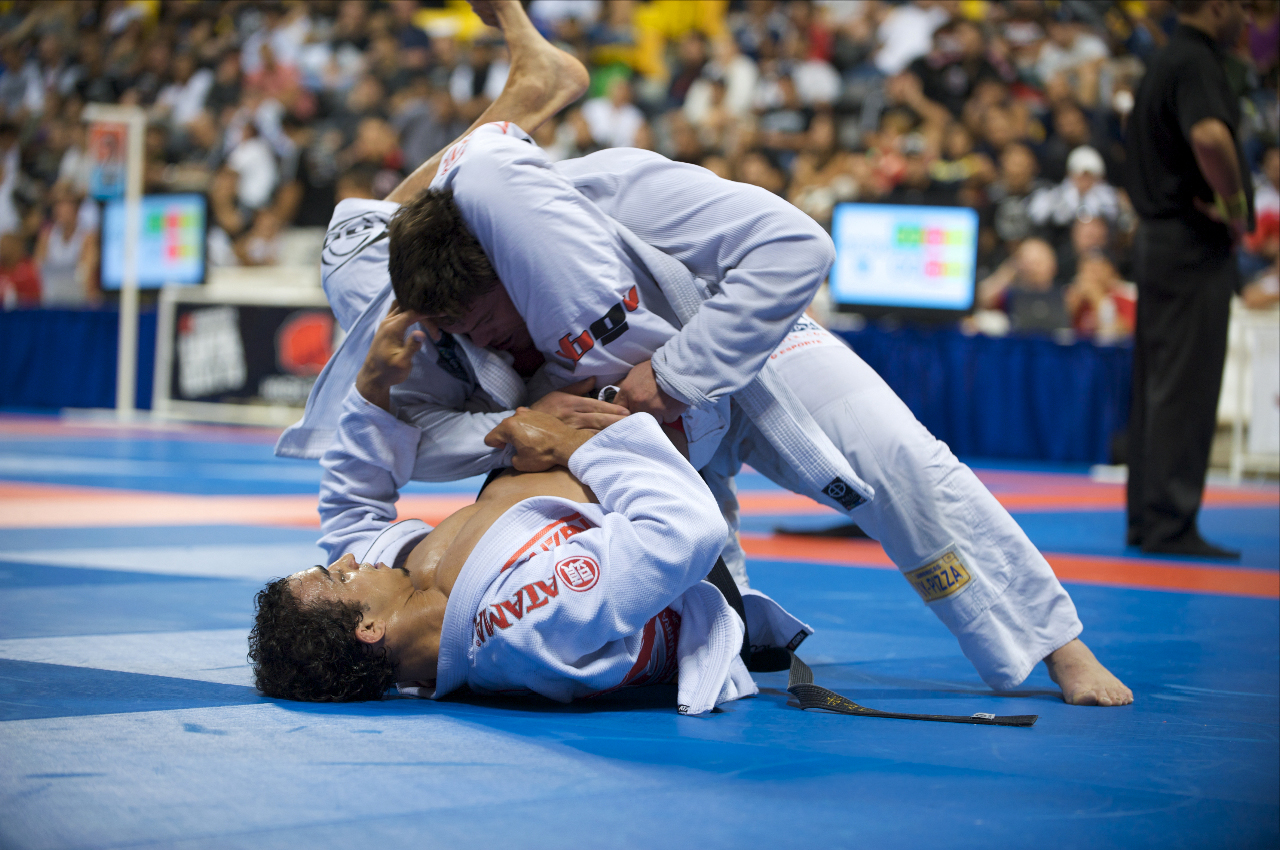

<h1>Processing the Cities Data</h1>

In [1]:
# import necessary libraries

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # libaray for arrays
from pandas.io.json import json_normalize # turns json into dataframes

print('Libraries imported.')

Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

Us-cities Dataset imported.


,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


In [3]:
df_data_1.shape

(28889, 19)

<h2> Cleaning up the data</h2>

In [4]:
# checking the population NaN's shows only 1.
print(df_data_1.isnull().sum())

city               0
city_ascii         0
state_id           0
state_name         0
county_fips        0
county_name        0
county_fips_all    0
county_name_all    0
lat                0
lng                0
population         0
density            0
source             0
military           0
incorporated       0
timezone           0
ranking            0
zips               1
id                 0
dtype: int64


In [5]:
# let's now drop all rows with any NaNs, since the other key columns aren't missing any.
df_data_1.dropna(inplace=True)

In [6]:
# with more population nulls, we can make it more readable by converting to int64 to remove the .0
df_data_1.population = df_data_1.population.astype(np.int64) 

# will work with a subset of columns:
all_cities = df_data_1[['city', 'population', 'lat', 'lng','source','state_id', 'county_name']]
all_cities.head()

,city,population,lat,lng,source,state_id,county_name
0,South Creek,2500,46.9994,-122.3921,polygon,WA,Pierce
1,Roslyn,947,47.2507,-121.0989,polygon,WA,Kittitas
2,Sprague,441,47.3048,-117.9713,polygon,WA,Lincoln
3,Gig Harbor,9507,47.3352,-122.5968,polygon,WA,Pierce
4,Lake Cassidy,3591,48.0639,-122.0920,polygon,WA,Snohomish


In [7]:
def choose_cities(df, state_id='WA', population=10000):
    '''Purpose: narrow down cities based on:
    input:  df(dataframe) of city data, 
            state_id (string) = desired state_id (WA default),
            population (int) = minimum population of cities (10K default)
    output: new df
    '''
    df = df[df['state_id'] == state_id]
    df = df[df['population'] > population]
    df = df.reset_index(drop=True)
    return(df)

In [8]:
# use the function from above to narrow down our cities and print out results by cities with a population count of over 10,000 people, and show a few rows
wa_cities = choose_cities(all_cities, 'WA', 10000)
print(wa_cities.shape)
print(wa_cities.groupby('state_id').count())
wa_cities.sort_values(['population'], ascending=False).reset_index(drop=True).head()

(122, 7)
          city  population  lat  lng  source  county_name
state_id                                                 
WA         122         122  122  122     122          122


,city,population,lat,lng,source,state_id,county_name
0,Seattle,3643765,47.6211,-122.3244,polygon,WA,King
1,Spokane,403043,47.6671,-117.4330,polygon,WA,Spokane
2,Kennewick,232915,46.1979,-119.1732,polygon,WA,Benton
3,Bremerton,216480,47.5436,-122.7121,polygon,WA,Kitsap
4,Tacoma,213418,47.2431,-122.4531,polygon,WA,Pierce


In [9]:
# check the new list of Washington State cities
wa_cities

,city,population,lat,lng,source,state_id,county_name
0,Parkland,37019,47.1417,-122.4376,polygon,WA,Pierce
1,Poulsbo,10670,47.7417,-122.6408,polygon,WA,Kitsap
2,Anacortes,17955,48.4878,-122.6292,polygon,WA,Skagit
3,Centralia,41643,46.7225,-122.9695,polygon,WA,Lewis
4,South Hill,56379,47.1203,-122.2848,polygon,WA,Pierce
5,Fife,10154,47.2328,-122.3518,polygon,WA,Pierce
6,Camano,15989,48.1865,-122.4708,polygon,WA,Island
7,Toppenish,14441,46.3807,-120.3125,polygon,WA,Yakima
8,Yakima,133233,46.5923,-120.5496,polygon,WA,Yakima
9,Edmonds,42209,47.8114,-122.3533,polygon,WA,Snohomish


In [10]:
wa_cities.shape

(122, 7)

<h3>*There are 121 cities 6 rows of data listed in the new wa_cities dataframe.</h3>

<hr>

<h1> Processing the Martial Arts Venues data from Foursquare</h1>

<h3> Define Foursquare Credentials and Version</h3>

In [11]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: Hidden
CLIENT_SECRET: Hidden


<h3> ***Note: Martial Arts Gyms, Academies, and Dojos will now be referd to as "dojos" for data processing ease***</h3>

In [13]:
def lookup_dojo(df, radius=RADIUS):
    '''purpose: lookup the number of dojo in a given city
    input:  dataframe of city names and lat/lng to base the lookup on
            radius in which to search (default set above)
    output: 1. dataframe 'city_dojo_roster:
    output: 2. dataframe 'city_dojo':  adds number_of_dojos column to inputted df of city, lat/lng,etc
    '''
    counter = 1 # only used to organize printed output
    per_city_dojo_count = []
    city_dojo_roster = pd.DataFrame(columns = ['city','dojo'])
    for city, clat, clng in zip(df['city'], df['lat'], df['lng']):
        # lookup by lat lng
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, clat, clng, VERSION, RADIUS, LIMIT, categoryId)
        
        # make the get call to foursquare
        results = requests.get(url).json()

        # assign relevant part of JSON to venues list
        venues = results['response']['venues']

        # tranform venues into a dataframe in case we want to use it later.
        dojo_list = json_normalize(venues)
        
        try:
            for name in dojo_list.loc[:,'name']:
                city_dojo_roster = city_dojo_roster.append({'city':city, 'dojo':name}, ignore_index=True)
        except KeyError:
            pass # handles case where 0 dojos exist for a city name
            
        # total count of dojos in this city
        per_city_dojo_count.append(dojo_list.shape[0])        
        
        print(counter, city, clat, clng, 'has count of ', dojo_list.shape[0])
        counter = counter +1
    # append the list of total counts per city onto our dataframe
    df = df.assign(number_of_dojos=np.nan).reset_index(drop=True)  # first creating the column avoids the SettingwithCopyWarning error
    df.loc[:,'number_of_dojos'] = per_city_dojo_count
    return(city_dojo_roster, df)

In [14]:
dojo_roster, city_dojos = lookup_dojo(wa_cities)

1 Parkland 47.1417 -122.4376 has count of  2
2 Poulsbo 47.7417 -122.6408 has count of  3
3 Anacortes 48.4878 -122.6292 has count of  1
4 Centralia 46.7225 -122.9695 has count of  1
5 South Hill 47.1203 -122.2848 has count of  3
6 Fife 47.2328 -122.3518 has count of  4
7 Camano 48.1865 -122.4708 has count of  0
8 Toppenish 46.3807 -120.3125 has count of  0
9 Yakima 46.5923 -120.5496 has count of  2
10 Edmonds 47.8114 -122.3533 has count of  14
11 Edgewood 47.2309 -122.2832 has count of  3
12 Battle Ground 45.7764 -122.5413 has count of  2
13 Shoreline 47.7564 -122.3426 has count of  14
14 Grandview 46.2431 -119.9084 has count of  0
15 Kelso 46.1248 -122.8909 has count of  2
16 Des Moines 47.3914 -122.3154 has count of  1
17 Seattle 47.6211 -122.3244 has count of  47
18 Everett 47.9524 -122.167 has count of  4
19 Newcastle 47.5303 -122.1633 has count of  7
20 Lakeland North 47.3374 -122.2814 has count of  13
21 Camas 45.6003 -122.4306 has count of  1
22 Tukwila 47.4748 -122.2727 has coun

In [15]:
dojo_roster.head()

,city,dojo
0,Parkland,Lenderman Academy of Martial Arts
1,Parkland,Pierce County Kyokushinkai
2,Poulsbo,Warrior Buddha
3,Poulsbo,Cross Martial Arts
4,Poulsbo,Cross Martial Arts


In [16]:
def clean_city_dojos(df):
    '''purpose: run a series of cleanups and calculations on the city_dojos dataframe
    input: dataframe city_dojos that comes from function lookup_dojos.  
    output: cleaned city_dojos, with added per capita calculations
    '''
    # Drop cities with 0 dojos
    df = df[(df['number_of_dojos']!=0)].reset_index(drop=True)
    
    # remove apostrophe characters from city names (caused label mapping problem)
    df['city'] = df['city'].replace("'", "", regex=True)
    df.columns = df.columns.str.strip()  #removes padding from city column name

    # adds a per population count of brewery column, and sort:
    df.loc[:,'dojos_per_capita'] = (df['number_of_dojos'] / df['population'])
    df.loc[:,'dojos_per_100k'] = (df['number_of_dojos']*100000 / df['population'])
    df.loc[:,'people_per_dojo'] = (df['population'] / df['number_of_dojos']).astype('int64')
    df = df.sort_values(['number_of_dojos'], ascending=False).reset_index(drop=True)
    
    return(df)

In [17]:
l = (len(city_dojos.columns))
city_dojos = clean_city_dojos(city_dojos)
print('After cleaning and calculating, city_dojos went from {} to {} columns. (should gain 3)\n'.format(l, len(city_dojos.columns)))

After cleaning and calculating, city_dojos went from 8 to 11 columns. (should gain 3)



<h2> Look Up Dojos in Specific County (King)</h2>

In [18]:
# if interested, you could check out each county's representation with this quick search

city_dojos[city_dojos.loc[:,'county_name'] == 'King']

,city,population,lat,lng,source,state_id,county_name,number_of_dojos,dojos_per_capita,dojos_per_100k,people_per_dojo
0,Seattle,3643765,47.6211,-122.3244,polygon,WA,King,47,0.000013,1.289875,77526
1,Bellevue,144444,47.5953,-122.1550,polygon,WA,King,22,0.000152,15.230816,6565
2,Redmond,64291,47.6762,-122.1169,polygon,WA,King,21,0.000327,32.663981,3061
4,Kirkland,88630,47.6997,-122.2041,polygon,WA,King,19,0.000214,21.437437,4664
7,Lake Forest Park,13392,47.7597,-122.2878,polygon,WA,King,14,0.001045,104.540024,956
9,Shoreline,56189,47.7564,-122.3426,polygon,WA,King,14,0.000249,24.915909,4013
11,Renton,101379,47.4758,-122.1905,polygon,WA,King,13,0.000128,12.823169,7798
12,Lakeland North,12487,47.3374,-122.2814,polygon,WA,King,13,0.001041,104.108273,960
13,Mercer Island,25261,47.5625,-122.2265,polygon,WA,King,13,0.000515,51.462729,1943
15,Tukwila,20144,47.4748,-122.2727,polygon,WA,King,13,0.000645,64.535346,1549


In [19]:
# create a map that's centered to our sample by taking mean of all lat/lon values

latitude=city_dojos['lat'].mean()
longitude=city_dojos['lng'].mean()
print('The geograpical centerpoint of all results is {}, {}.'.format(latitude, longitude))

The geograpical centerpoint of all results is 47.34653725490195, -122.07412843137251.


<hr>

<h1> Visualizing The Results</h1>

In [20]:
# import necessary libraries

!pip install folium
import folium # map rendering library

     |████████████████████████████████| 92kB 1.6MB/s eta 0:00:01


In [21]:
from folium.plugins import MarkerCluster

dojo_map = folium.Map(location=[latitude, longitude], zoom_start=7)
mc = MarkerCluster()

# add markers to map
for row in city_dojos.itertuples():
    mc.add_child(folium.Marker(location=[row.lat, row.lng], 
                               popup= ("City: {city}<br>"
                                       "Population: {pop}<br>"
                                       "DojoCount: {count}<br>"
                                       "People per Dojo: {ppb}"
                                      ).format(city=row.city, 
                                               pop=row.population, 
                                               count=row.number_of_dojos, 
                                               ppb=row.people_per_dojo)))
      
dojo_map.add_child(mc)
dojo_map.save('WAdojos.html')
dojo_map

<h2> You can navigate the map by clicking on the cluster circles to zoom in and find markers for each city. Info such as "City Name", "Population", "Dojo Count", and "People Per Dojo" is avaliable when clicking on each individual city marker.</h2>

<hr>

<h1>Plotting The Results</h1>

Although maps give us a good visual of cities. We can click on individual cities to learn their dojo counts. However, providing a general overview will help us easily see which cities have the highest numbers of dojos, and when taking each city population estimates into account we can come up with a people per dojo stat.

In [22]:
# let's put this data into a dataframe

dojo_count = city_dojos[['city', 'number_of_dojos']]
dojo_count = dojo_count.sort_values(['number_of_dojos'], ascending=True).reset_index(drop=True)
dojo_count_top = dojo_count.sort_values(['number_of_dojos'], ascending=False).reset_index(drop=True).head(10)
dojo_count_top = dojo_count_top[::-1].head(15)
dojo_count_top

,city,number_of_dojos
9,Shoreline,14
8,Edmonds,14
7,Lake Forest Park,14
6,Martha Lake,14
5,Mountlake Terrace,16
4,Kirkland,19
3,North Lynnwood,20
2,Redmond,21
1,Bellevue,22
0,Seattle,47


<h2> Let's use a horizontal barchart to help visualize the top city's dojo count</h2>

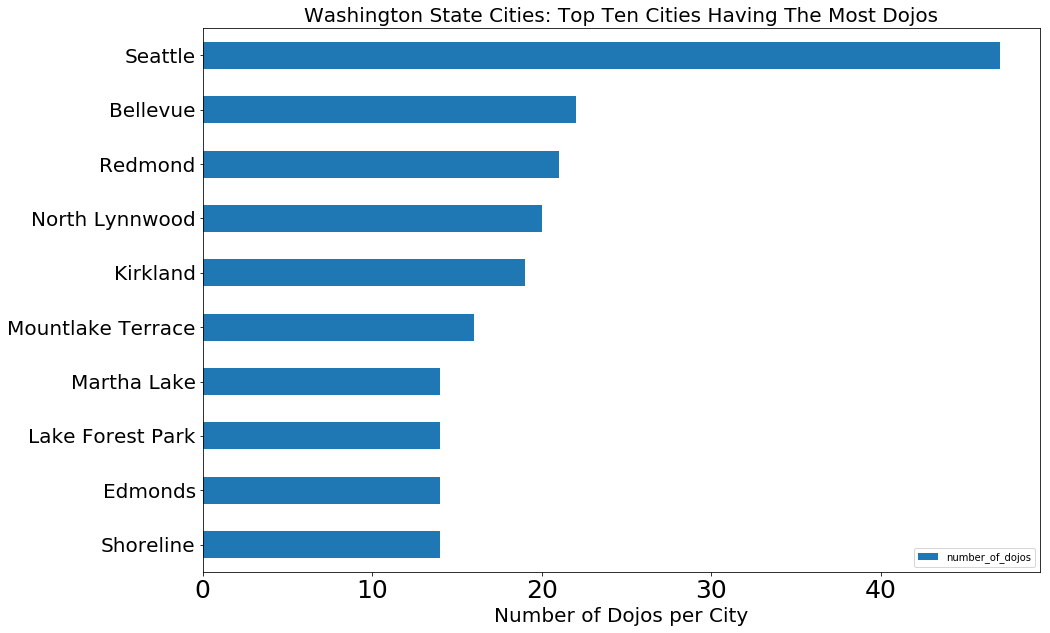

In [24]:
# plotting the data

import matplotlib.pyplot as plt
dojo_count_top.plot(kind='barh', figsize=(15, 10))

plt.xlabel('Number of Dojos per City',fontsize=20) # add to x-label to the plot

#plt.ylabel('City Name', fontsize=20) # add y-label to the plot
plt.title('Washington State Cities: Top Ten Cities Having The Most Dojos', fontsize=20) # add title to the plot
plt.yticks([s for s in range(len(dojo_count_top))], dojo_count_top.city, fontsize=20)
plt.xticks(fontsize=25)

plt.show()

In [25]:
# repeat with full results of all cities in Washington State with population over 10,000 people

dojo_count = city_dojos[['city', 'number_of_dojos']]
dojo_count = dojo_count.sort_values(['number_of_dojos'], ascending=True).reset_index(drop=True)
dojo_count[::-1].head()

,city,number_of_dojos
101,Seattle,47
100,Bellevue,22
99,Redmond,21
98,North Lynnwood,20
97,Kirkland,19


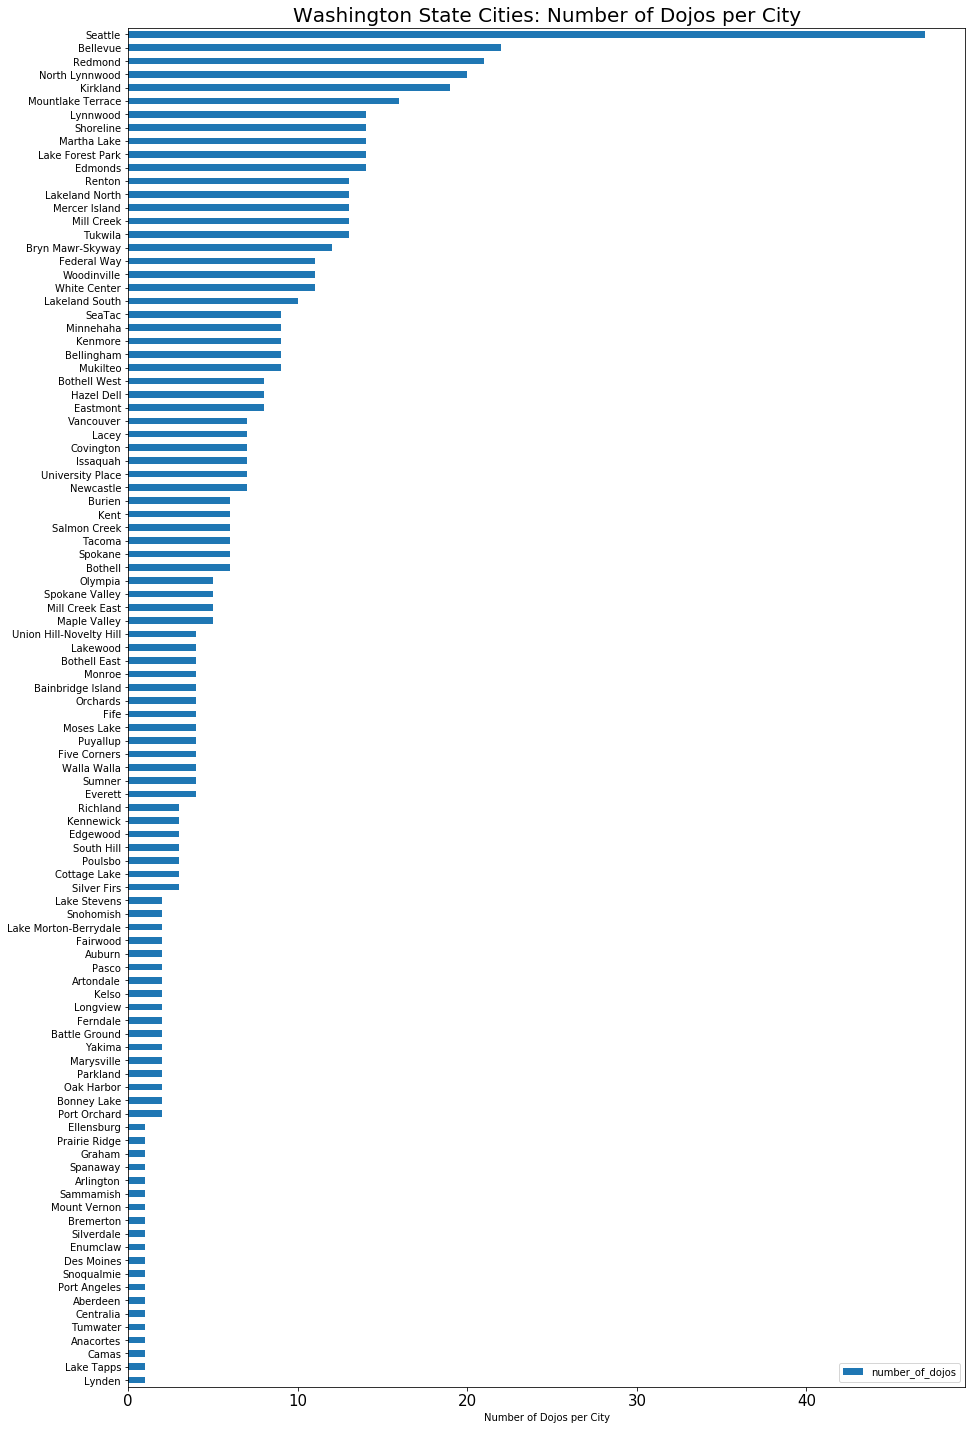

In [26]:
# plotting the data for all cities in Washington State

import matplotlib.pyplot as plt
dojo_count.plot(kind='barh', figsize=(15, 25))

plt.xlabel('Number of Dojos per City',fontsize=10) # add to x-label to the plot
#plt.ylabel('City Name', fontsize=20) # add y-label to the plot
plt.title('Washington State Cities: Number of Dojos per City', fontsize=20) # add title to the plot
plt.yticks([s for s in range(len(dojo_count))], dojo_count.city, fontsize=10)
plt.xticks(fontsize=15)

plt.show()

<h1> Find The Number of Dojos per 100,000 residents and Plot The Top 10</h1>

In [27]:
percapita_dojos = city_dojos[['city', 'dojos_per_100k']]
percapita_dojos = percapita_dojos.sort_values(['dojos_per_100k'], ascending=True).reset_index(drop=True)
percapita_dojos_top = percapita_dojos.tail(10)

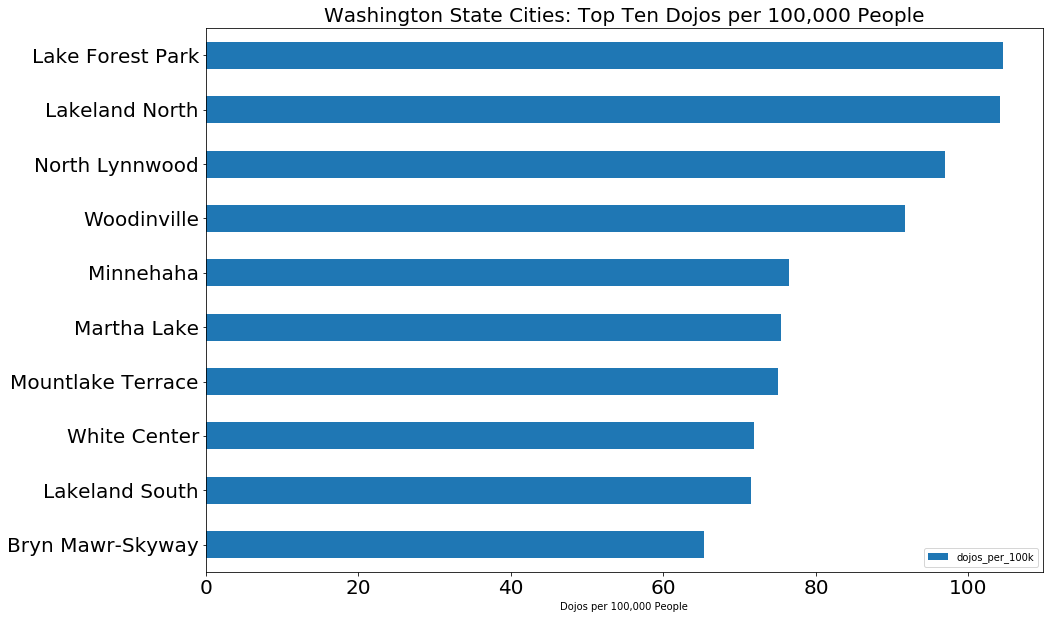

In [28]:
# plotting the top ten

import matplotlib.pyplot as plt
percapita_dojos_top.plot(kind='barh', figsize=(15, 10))

plt.xlabel('Dojos per 100,000 People',fontsize=10) # add to x-label to the plot
#plt.ylabel('City Name', fontsize=20) # add y-label to the plot
plt.title('Washington State Cities: Top Ten Dojos per 100,000 People', fontsize=20) # add title to the plot
plt.yticks([s for s in range(len(percapita_dojos_top))], percapita_dojos_top.city, fontsize=20)
plt.xticks(fontsize=20)


plt.show()

<h2> Plot the whole dataset:</h2>

In [29]:
percapita_dojos = city_dojos[['city', 'dojos_per_100k']]
percapita_dojos = percapita_dojos.sort_values(['dojos_per_100k'], ascending=True).reset_index(drop=True)

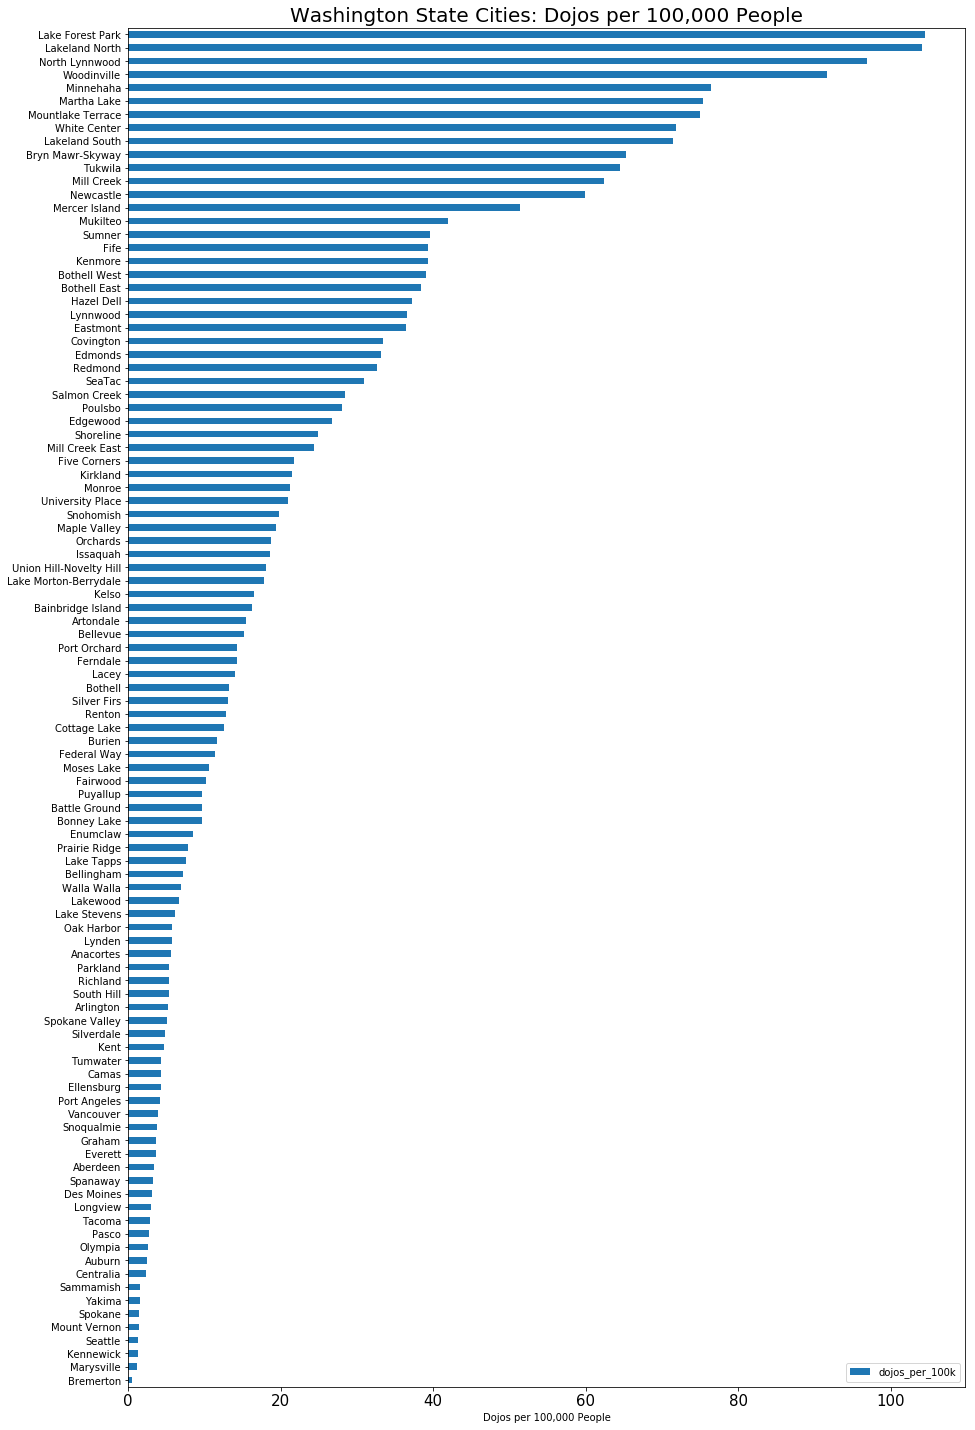

In [30]:
# plotting the whole dataset
import matplotlib.pyplot as plt
percapita_dojos.plot(kind='barh', figsize=(15, 25))

plt.xlabel('Dojos per 100,000 People',fontsize=10) # add to x-label to the plot
#plt.ylabel('City Name', fontsize=20) # add y-label to the plot
plt.title('Washington State Cities: Dojos per 100,000 People', fontsize=20) # add title to the plot
plt.yticks([s for s in range(len(percapita_dojos))], percapita_dojos.city, fontsize=10)
plt.xticks(fontsize=15)


plt.show()

<hr>

<h1> Search According to Specific Type of Martial Arts Academy</h1>

<h2>1) Search for BJJ Acadimies</h2>
<h3>*Because Brazilian Jiujitsu can be refered to in different ways, perform search with other name parameters to find more acadimies</h3>

In [31]:
# perform search for only bjj dojos

dojo_roster[dojo_roster.dojo.str.contains('bjj',case=False)]

,city,dojo
13,Fife,MABJJ
25,Edmonds,Edmonds BJJ
36,Shoreline,Edmonds BJJ
65,Seattle,Summit Bjj
167,Olympia,BJJ Olympia & NW High Intensity Training
308,Lake Morton-Berrydale,Phantom BJJ
414,Lake Forest Park,Edmonds BJJ
479,Tacoma,MABJJ
534,Covington,Phantom BJJ
583,Mountlake Terrace,Edmonds BJJ


In [32]:
# perform search for using parameters "jiu-jitsu" to find more bjj dojos

jiujitsu_dojo = dojo_roster[dojo_roster.dojo.str.contains('jiu-jitsu',case=False)]
jiujitsu_dojo

,city,dojo
10,Fife,Fife Brazilian Jiu-Jitsu
17,Edmonds,Edmonds Brazilian Jiu-Jitsu
52,Seattle,Summit Brazilian Jiu-Jitsu Club
75,Seattle,Praxis Brazilian Jiu-Jitsu
146,Bellevue,Gracie Barra Brazilian Jiu-Jitsu
156,Bellevue,Gracie Barra Jiu-Jitsu & MMA
173,Minnehaha,Progressive Jiu-Jitsu
201,Vancouver,Progressive Jiu-Jitsu
226,Martha Lake,Edmonds Brazilian Jiu-Jitsu
311,Bothell West,Edmonds Brazilian Jiu-Jitsu


In [33]:
# perform search for using parameters "gracie" to find more bjj dojos

gracie_dojo = dojo_roster[dojo_roster.dojo.str.contains('gracie',case=False)]
gracie_dojo

,city,dojo
110,Lakeland North,Gracie Barra Federal Way
146,Bellevue,Gracie Barra Brazilian Jiu-Jitsu
156,Bellevue,Gracie Barra Jiu-Jitsu & MMA
237,Lakeland South,Gracie Barra Federal Way
288,Issaquah,Gracie Barra Jiu Jitsu
340,Kirkland,Gracie Barra Kirkland
391,Federal Way,Gracie Barra Federal Way
602,Woodinville,Gracie Barra Kirkland


<h2> *** Note that there is another type of jiu-jitsu practiced specifically without the traditional uniform called, "nogi."*** </h2>

<h4>One such branch of Bjj was developed especially for MMA competition at Founder and head professor, Eddie Bravo's "10TH Planet Studios" loacted worldwide. Currently, there are 2 in the state of Washington.</h4>

In [34]:
# perform search for using parameters "10" to find more bjj dojos

tenthth_planet_dojo = dojo_roster[dojo_roster.dojo.str.contains('10',case=False)]
tenthth_planet_dojo

,city,dojo
145,Bellevue,10th Planet Seattle
304,Spokane Valley,Hit Pit 10th Planet Jiu Jitsu


<h2>2) Search for MMA Acadimies</h2>

In [35]:
mma_dojo = dojo_roster[dojo_roster.dojo.str.contains('mma',case=False)]
mma_dojo

,city,dojo
6,Centralia,Mma Class
61,Seattle,Ivan Salaverry MMA
156,Bellevue,Gracie Barra Jiu-Jitsu & MMA
164,University Place,T-TOWN MMA
176,Minnehaha,Gladiator MMA
178,Minnehaha,"Touch M Up MMA, LLC"
204,Vancouver,Gladiator MMA
217,Kent,All Fitness MMA
225,Martha Lake,Crazy Monkey MMA
251,Kenmore,Northshore MMA Academy


<h2>3) Search for Kickboxing & Muay Thai Gyms

In [37]:
kickboxing_dojo = dojo_roster[dojo_roster.dojo.str.contains('kickboxing',case=False)]
kickboxing_dojo

,city,dojo
39,Shoreline,"MKG Martial Arts, Kickboxing & Fitness"
96,Seattle,I Love Kickboxing
114,Lakeland North,Kickboxing Class At The Federal Way Community ...
116,Lakeland North,NW Muay Thai Kickboxing
127,Tukwila,Leading Edge Kickboxing & Martial Arts
185,Bryn Mawr-Skyway,Leading Edge Kickboxing & Martial Arts
238,Lakeland South,NW Muay Thai Kickboxing
240,Lakeland South,Kickboxing Class At The Federal Way Community ...
344,Kirkland,AMC Kickboxing And Pankration
390,Federal Way,Kickboxing Class At The Federal Way Community ...
